In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
credit = pd.read_csv("Credit-isl.csv")

In [12]:
credit

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [13]:
credit.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

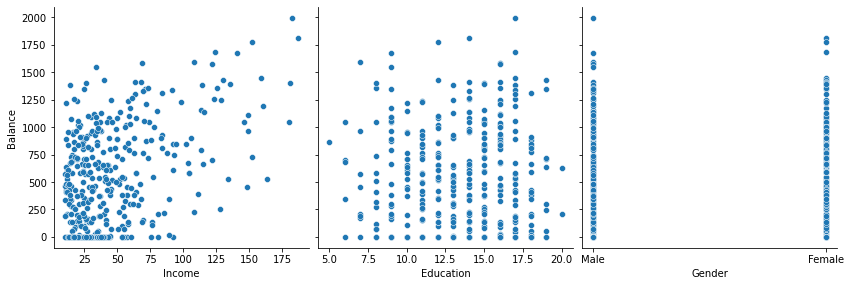

In [15]:
sns.pairplot(credit, x_vars=['Income','Education', 'Gender'], 
             y_vars='Balance', height=4, aspect=1, kind='scatter')
plt.show()

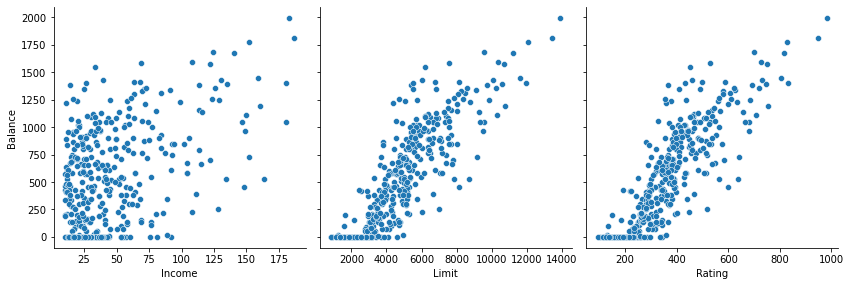

In [16]:
sns.pairplot(credit, x_vars=['Income','Limit', 'Rating'], 
             y_vars='Balance', height=4, aspect=1, kind='scatter')
plt.show()

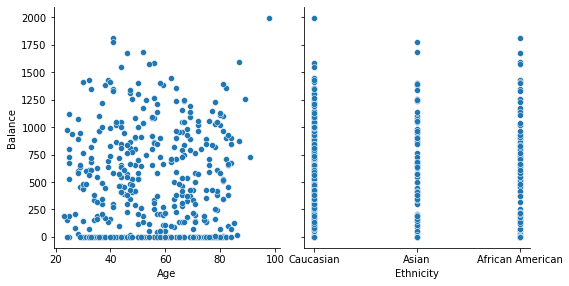

In [17]:
sns.pairplot(credit, x_vars=['Age','Ethnicity'], 
             y_vars='Balance', height=4, aspect=1, kind='scatter')
plt.show()

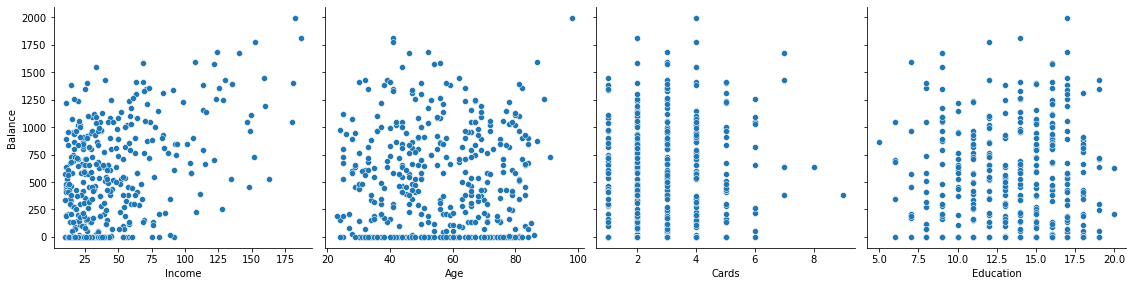

In [18]:
sns.pairplot(credit, x_vars=['Income','Age', 'Cards', 'Education'], 
             y_vars='Balance', height=4, aspect=1, kind='scatter')
plt.show()

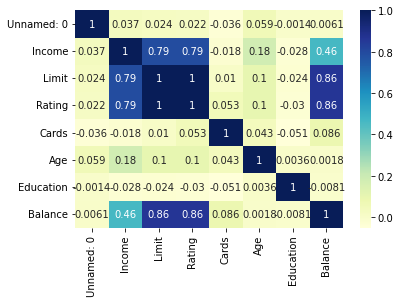

In [19]:
sns.heatmap(credit.corr(),
cmap="YlGnBu", annot = True)
plt.show()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
pip install -U scikit-learn scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
X = credit['Limit']
y = credit['Balance']

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
import statsmodels.api as sm

X_train_sm = sm.add_constant (X_train)

In [39]:
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const   -309.378392
Limit      0.176274
dtype: float64

In [40]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     864.3
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.69e-87
Time:                        12:21:33   Log-Likelihood:                -1913.3
No. Observations:                 280   AIC:                             3831.
Df Residuals:                     278   BIC:                             3838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -309.3784     31.296     -9.886      0.000    -370.986    -247.771
Limit          0.1763      0.006     29.399      0.000       0.164       0.188
==============================================================================
Omnibus:                       17.847   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.752
Skew:                           0.477   Prob(JB):                     6.95e-06
Kurtosis:                       4.060   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

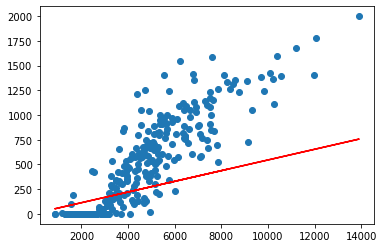

In [42]:
plt.scatter (X_train, y_train)
plt.plot (X_train, 5.598 + 0.054*X_train, 'r')
plt.show()

In [45]:
X_test_sm = sm.add_constant (X_test)

y_test_pred = lr.predict (X_test_sm)

y_test_pred

248    -149.850710
318     -47.611974
173     527.040229
285     -22.757385
184    1733.457309
          ...     
80      298.589537
157     663.828606
300     507.121303
31      172.377581
204     626.634859
Length: 120, dtype: float64

In [46]:
from sklearn.metrics import r2_score

r_squared = r2_score (y_test, y_test_pred)
r_squared

0.7092000201952873

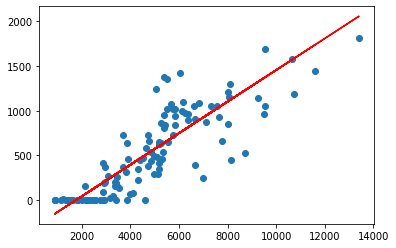

In [47]:
plt.scatter (X_test, y_test)
plt.plot (X_test, y_test_pred, 'r')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split 
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
X_train_lm.shape
X_train_lm = X_train_lm.values.reshape (-1,1)
X_test_lm = X_test_lm.values.reshape (-1,1)

print (X_train_lm.shape)
print (X_test_lm.shape)

(280, 1)
(120, 1)


In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit (X_train_lm, y_train_lm)

print ("Intercept:", lm.intercept_)
print ('slope :', lm.coef_)

Intercept: -309.37839174262353
slope : [0.17627368]
